In [8]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from sklearn import metrics

from Inception import InceptionUnit
from ResNet import ResidualUnit
from Xception import XceptionUnit
from model import ResNet, GoogleNet, Xception

In [9]:
datasets = np.load('D:\Programming\Python\Tender-Notice-Extraction\source\models\datasets2class.npy', allow_pickle=True)
X = []
y = []
for ele in datasets:
    X.append(ele[0])
    y.append(ele[1])
X = np.array(X)
y = np.array(y)

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
epoch = 3
f = 1
modelNo = 1
# major_ticks = np.arange(0, epoch+1, 5)
# minor_ticks = np.arange(0, epoch+1, 2.5)

In [ ]:
try:
    os.remove("D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_resnet.h5")
except:
    pass
try:
    os.remove("D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_googlenet.h5")
except:
    pass
try:
    os.remove("D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_xception.h5")
except:
    pass

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=f)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=f)

In [ ]:
model_resnet = ResNet()
model_resnet.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy",
                                                                                    keras.metrics.Precision(),
                                                                                    keras.metrics.Recall(),
                                                                                    tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

print("\n\nTraining ResNet\n\n")
# checkpoint_cb_resnet = keras.callbacks.ModelCheckpoint(filepath='D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_resnet.h5', save_best_only=True)
# history_resnet = model_resnet.fit(X_train, y_train,
#                                     epochs = epoch,
                                    # validation_data = (X_valid, y_valid),
                                    # callbacks = [checkpoint_cb_resnet],
                                    # batch_size = 16)

model_resnet = keras.models.load_model('D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_resnet.h5', custom_objects={'ResidualUnit': ResidualUnit})
# model_resnet.save('D:\Programming\Python\Tender-Notice-Extraction\source\models\model_resnet_' + str(f) + '.h5')


print("\n\nEvaluating ResNet\n\n")
model_resnet.evaluate(X_test, y_test)


In [ ]:
fig1 = plt.figure(figsize=(1080,720))
ax1 = fig1.add_subplot(2, 1, 1)

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)

ax1.grid(which='both')
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)

# ax1.set_aspect("equal")
ax1.plot(history_resnet.history['accuracy'], "-")
ax1.plot(history_resnet.history['val_accuracy'], ":")
ax1.set_title('ResNet Accuracy'+str(f))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='lower right')

ax2 = fig1.add_subplot(2, 1, 2)

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.5)

ax2.plot(history_resnet.history['loss'], "-")
ax2.plot(history_resnet.history['val_loss'], ":")
ax2.set_title('ResNet Loss'+str(f))
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\resnet_accuracy_loss_' + str(f) + '.jpeg')
plt.clf()


fig2 = plt.figure(figsize=(1080,720))
ax3 = fig2.add_subplot(3, 1, 1)

ax3.set_xticks(major_ticks)
ax3.set_xticks(minor_ticks, minor=True)
ax3.grid(which='both')
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.5)

ax3.plot(history_resnet.history['precision'], "-")
ax3.plot(history_resnet.history['val_precision'], ":")
ax3.set_title('ResNet Precision'+str(f))
ax3.set_ylabel('Precision')
ax3.set_xlabel('Epoch')
ax3.legend(['Train', 'Validation'], loc='lower right')

ax4 = fig2.add_subplot(3, 1, 2)
ax4.set_xticks(major_ticks)
ax4.set_xticks(minor_ticks, minor=True)
ax4.grid(which='both')
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.5)

ax4.plot(history_resnet.history['recall'], "-")
ax4.plot(history_resnet.history['val_recall'], ":")
ax4.set_title('ResNet Recall'+str(f))
ax4.set_ylabel('Recall')
ax4.set_xlabel('Epoch')
ax4.legend(['Train', 'Validation'], loc='lower right')

ax5 = fig2.add_subplot(3, 1, 3)
ax5.set_xticks(major_ticks)
ax5.set_xticks(minor_ticks, minor=True)
ax5.grid(which='both')
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.5)

ax5.plot(history_resnet.history['f1_score'], "-")
ax5.plot(history_resnet.history['val_f1_score'], ":")
ax5.set_title('ResNet F1 Score'+str(f))
ax5.set_ylabel('F1 Score')
ax5.set_xlabel('Epoch')
ax5.legend(['Train', 'Validation'], loc='lower right')

plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\resnet_precision_recall_f1score' + str(f) + '.jpeg')
plt.clf()

In [ ]:
model_googlenet = GoogleNet()
model_googlenet.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy",
                                                                                        keras.metrics.Precision(),
                                                                                        keras.metrics.Recall(),
                                                                                        tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

print("\n\nTraining GoogleNet\n\n")
checkpoint_cb_googlenet = keras.callbacks.ModelCheckpoint(filepath='D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_googlenet.h5', save_best_only=True)
history_googlenet = model_googlenet.fit(X_train, y_train,
                                            epochs = epoch,
                                            validation_data = (X_valid, y_valid),
                                            callbacks = [checkpoint_cb_googlenet],
                                            batch_size = 8)

model_googlenet = keras.models.load_model('D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_googlenet.h5', custom_objects={'InceptionUnit': InceptionUnit})
model_googlenet.save('D:\Programming\Python\Tender-Notice-Extraction\source\models\model_googlenet_' + str(f) + '.h5')

print("\n\nEvaluating GoogleNet\n\n")
model_googlenet.evaluate(X_test, y_test)

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 1, 1)

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='both')
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)

ax1.plot(history_googlenet.history['accuracy'], "-")
ax1.plot(history_googlenet.history['val_accuracy'], ":")
ax1.set_title('GoogleNet Accuracy' + str(f))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='lower right')

ax2 = fig1.add_subplot(2, 1, 2)

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.5)

ax2.plot(history_googlenet.history['loss'], "-")
ax2.plot(history_googlenet.history['val_loss'], ":")
ax2.set_title('GoogleNet Loss' + str(f))
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='lower right')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\googlenet_accuracy_loss_' + str(f) + '.jpeg')
plt.clf()

fig2 = plt.figure()
ax3 = fig2.add_subplot(3, 1, 1)

ax3.set_xticks(major_ticks)
ax3.set_xticks(minor_ticks, minor=True)
ax3.grid(which='both')
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.5)

ax3.plot(history_googlenet.history['precision'], "-")
ax3.plot(history_googlenet.history['val_precision'], ":")
ax3.title('GoogleNet Precision' + str(f))
ax3.ylabel('Precision')
ax3.xlabel('Epoch')
ax3.legend(['Train', 'Validation'], loc='lower right')

ax4 = fig2.add_subplot(3, 1, 2)

ax4.set_xticks(major_ticks)
ax4.set_xticks(minor_ticks, minor=True)
ax4.grid(which='both')
ax4.grid(which='minor', alpha=0.2)

ax4.plot(history_googlenet.history['recall'], "-")
ax4.plot(history_googlenet.history['val_recall'], ":")
ax4.set_title('GoogleNet Recall' + str(f))
ax4.set_ylabel('Recall')
ax4.set_xlabel('Epoch')
ax4.legend(['Train', 'Validation'], loc='lower right')

ax5 = fig2.add_subplot(3, 1, 3)

ax5.set_xticks(major_ticks)
ax5.set_xticks(minor_ticks, minor=True)
ax5.grid(which='both')
ax5.grid(which='minor', alpha=0.2)

ax5.plot(history_googlenet.history['f1score'], "-")
ax5.plot(history_googlenet.history['val_f1score'], ":")
ax5.set_title('GoogleNet F1 Score' + str(f))
ax5.set_ylabel('F1 Score')
ax5.set_xlabel('Epoch')
ax5.legend(['Train', 'Validation'], loc='lower right')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\googlenet_precision_recall_f1score_' + str(f) + '.jpeg')
plt.clf()

In [11]:
model_xception = Xception()
# model_xception.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy",
#                                                                                         keras.metrics.Precision(),
#                                                                                         keras.metrics.Recall(),
#                                                                                         tfa.metrics.F1Score(num_classes=2, threshold=0.5)])

# checkpoint_cb_xception = keras.callbacks.ModelCheckpoint(filepath='D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_xception.h5', save_best_only=True)
# history_xception = model_xception.fit(X_train, y_train,
#                                         epochs = epoch,
#                                         validation_data = (X_valid, y_valid),
#                                         batch_size = 8)

# model_xception = keras.models.load_model('D:\Programming\Python\Tender-Notice-Extraction\source\models\checkpoint_xception.h5', custom_objects={'XceptionUnit': XceptionUnit})
model_xception = keras.models.load_model('D:\Programming\Python\Tender-Notice-Extraction\source\models\model_xception_' + str(f) + '.h5', custom_objects={'XceptionUnit': XceptionUnit})
# model_xception.save('D:\Programming\Python\Tender-Notice-Extraction\source\models\model_xception_' + str(f) + '.h5')

print("\n\nEvaluating Xception\n\n")
# model_xception.evaluate(X_test, y_test)



Evaluating Xception




In [5]:
history_xception.history['f1_score']

[array([0.9519901 , 0.95510703], dtype=float32),
 array([0.9766454, 0.9779491], dtype=float32),
 array([0.98357713, 0.9845111 ], dtype=float32)]

In [6]:
history_xception.history['precision']

[0.9536008834838867, 0.9773159623146057, 0.9840577244758606]

In [7]:
history_xception.history['recall']

[0.9536008834838867, 0.9773159623146057, 0.9840577244758606]

C:\Users\bhatt\AppData\Local\Temp\ipykernel_8480\2909744112.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\xception_confusion_matrix_' + str(f) + '.jpeg',dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_8480\2909744112.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\xception_confusion_matrix_' + str(f) + '.jpeg',dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_8480\2909744112.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  

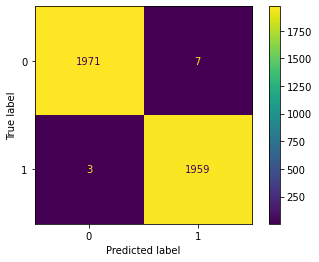

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pre = model_xception.predict(X_test)
predicted_categories = tf.argmax(y_pre, axis=1)
true_categories = tf.concat([y for x, y in y_test], axis=0)
ConfusionMatrixDisplay.from_predictions(true_categories, predicted_categories)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\xception_confusion_matrix_' + str(f) + '.jpeg',dpi=300, quality=80, optimize=True, progressive=True)

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 1, 1)

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='both')
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)

ax1.plot(history_xception.history['accuracy'], "-")
ax1.plot(history_xception.history['val_accuracy'], ":")
ax1.set_title('Xception Accuracy'  + str(f))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='lower right')


ax2 = fig1.add_subplot(2, 1, 2)

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='both')
ax2.grid(which='minor', alpha=0.2)

ax2.plot(history_xception.history['loss'], "-")
ax2.plot(history_xception.history['val_loss'], ":")
ax2.set_title('Xception Loss' + str(f))
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='lower right')

plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\xception_accuracy_loss_' + str(f) + '.jpeg')
plt.clf()

fig2 = plt.figure()
ax3 = fig2.add_subplot(3, 1, 1)

ax3.set_xticks(major_ticks)
ax3.set_xticks(minor_ticks, minor=True)
ax3.grid(which='both')
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.5)

ax3.plot(history_xception.history['precision'], "-")
ax3.plot(history_xception.history['val_precision'], ":")
ax3.set_title('Xception Precision' + str(f))
ax3.set_ylabel('Precision')
ax3.set_xlabel('Epoch')
ax3.legend(['Train', 'Validation'], loc='lower right')

ax4 = fig2.add_subplot(3, 1, 2)

ax4.set_xticks(major_ticks)
ax4.set_xticks(minor_ticks, minor=True)
ax4.grid(which='both')
ax4.grid(which='minor', alpha=0.2)

ax4.plot(history_xception.history['recall'], "-")
ax4.plot(history_xception.history['val_recall'], ":")
ax4.set_title('Xception Recall' + str(f))
ax4.set_ylabel('Recall')
ax4.set_xlabel('Epoch')
ax4.legend(['Train', 'Validation'], loc='lower right')

ax5 = fig2.add_subplot(3, 1, 3)

ax5.set_xticks(major_ticks)
ax5.set_xticks(minor_ticks, minor=True)
ax5.grid(which='both')
ax5.grid(which='minor', alpha=0.2)

ax5.plot(history_xception.history['f1score'], "-")
ax5.plot(history_xception.history['val_f1score'], ":")
ax5.set_title('Xception F1 Score' + str(f))
ax5.set_ylabel('F1 Score')
ax5.set_xlabel('Epoch')
ax5.legend(['Train', 'Validation'], loc='lower right')

plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.8)
plt.savefig('D:\Programming\Python\Tender-Notice-Extraction\img\\xception_precision_recall_f1_' + str(f) + '.jpeg')

plt.clf()